In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline 

In [2]:
img = cv2.imread('img_2.jpg')
img.shape

(4000, 6000, 3)

In [3]:
def build_rgb_histogram(image, name="Image"):
    channels = cv2.split(image)
    colors = ("b", "g", "r")
    total_pixels = image.shape[0] * image.shape[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 4]}, figsize=(15, 6))
    fig.tight_layout()

    ax1.set_title(name)
    ax1.imshow(image[:,:,::-1])
    
    ax2.set_title("Color histogram")
    ax2.set(xlabel='Bins', ylabel='# of pixels')

    # features = []

    for (channel, color) in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        hist = np.true_divide(hist, np.max(hist)) # normalize

        # plot the histogram
        ax2.plot(hist, color = color)
        ax2.set_xlim([0, 256])

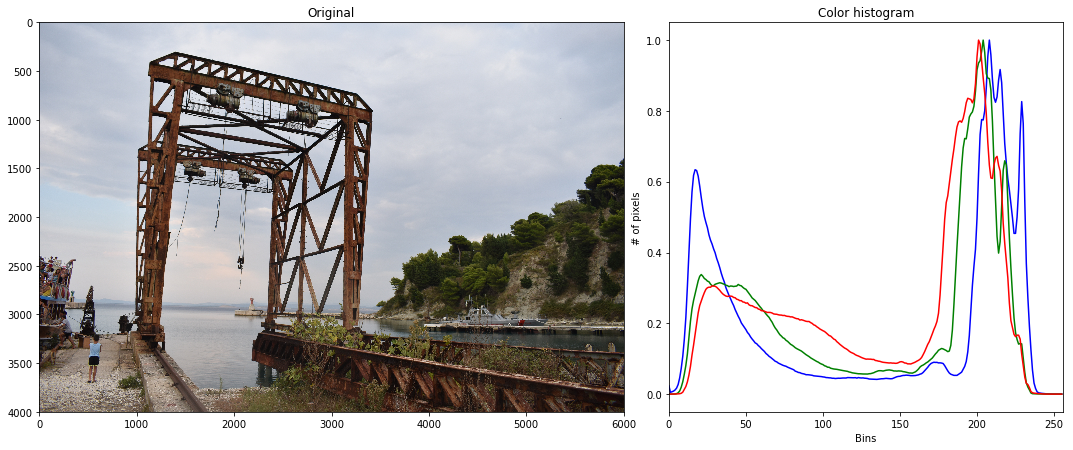

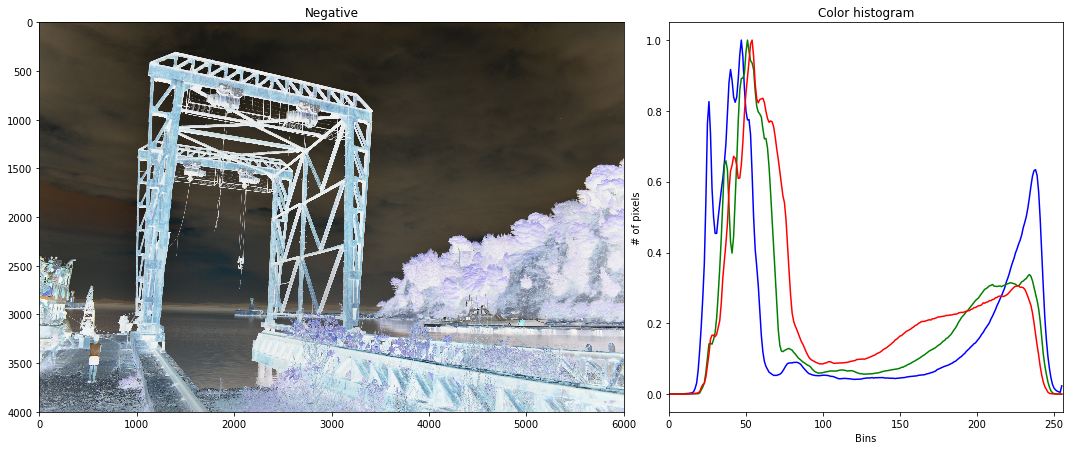

In [4]:
import filters as f
% matplotlib inline

build_rgb_histogram(img, "Original")
build_rgb_histogram(f.negative(img), "Negative")

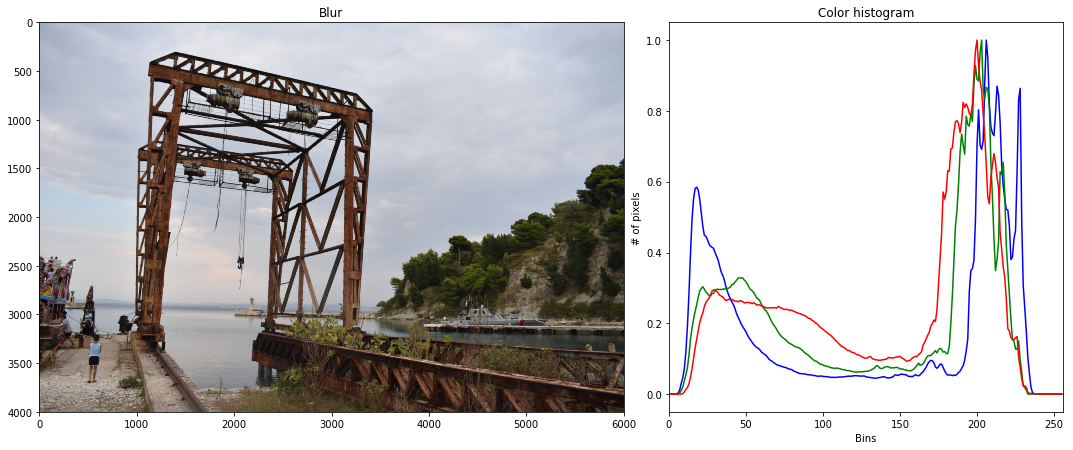

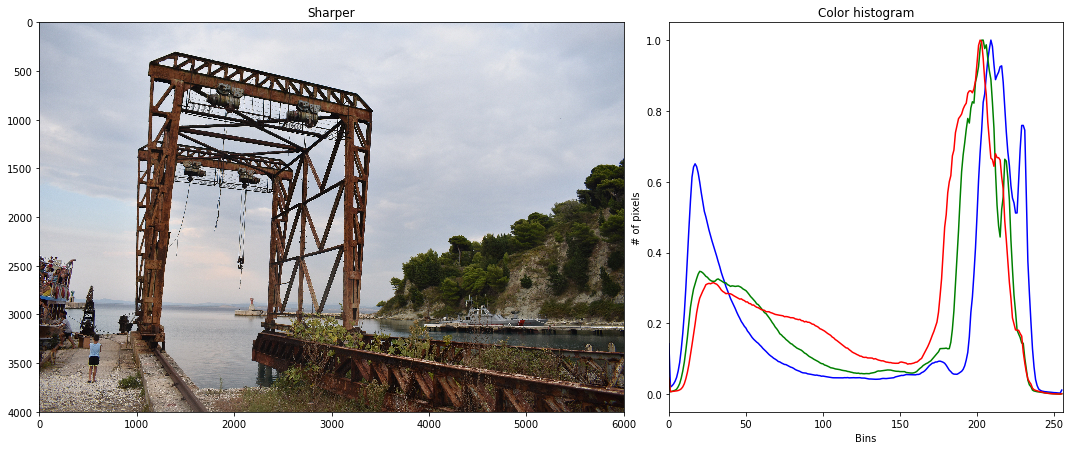

In [5]:


build_rgb_histogram(f.blur(img, 15), "Blur")
build_rgb_histogram(f.sharpen(img, 1.5, 0.5), "Sharper")


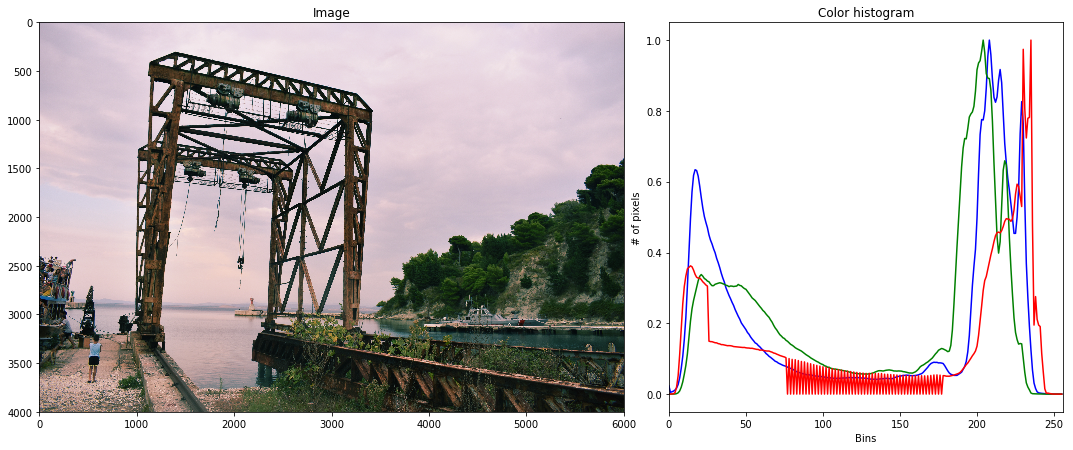

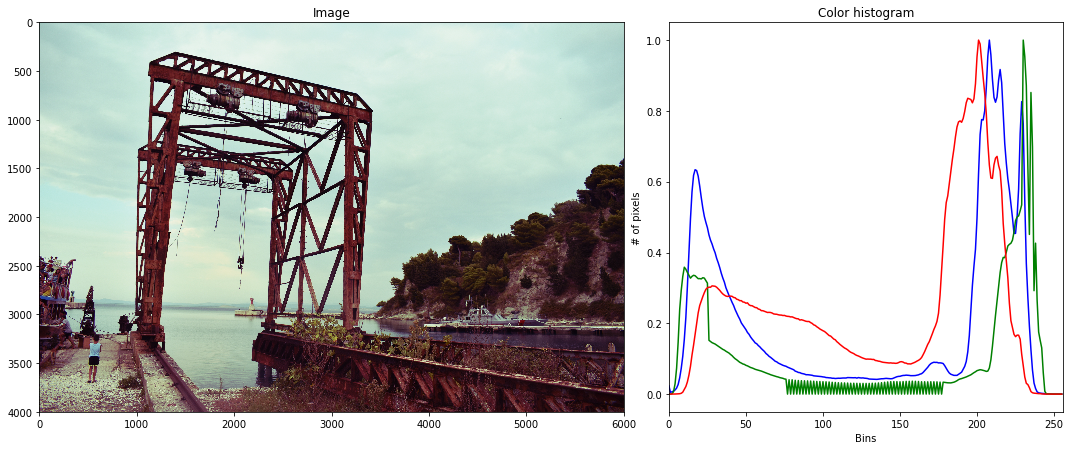

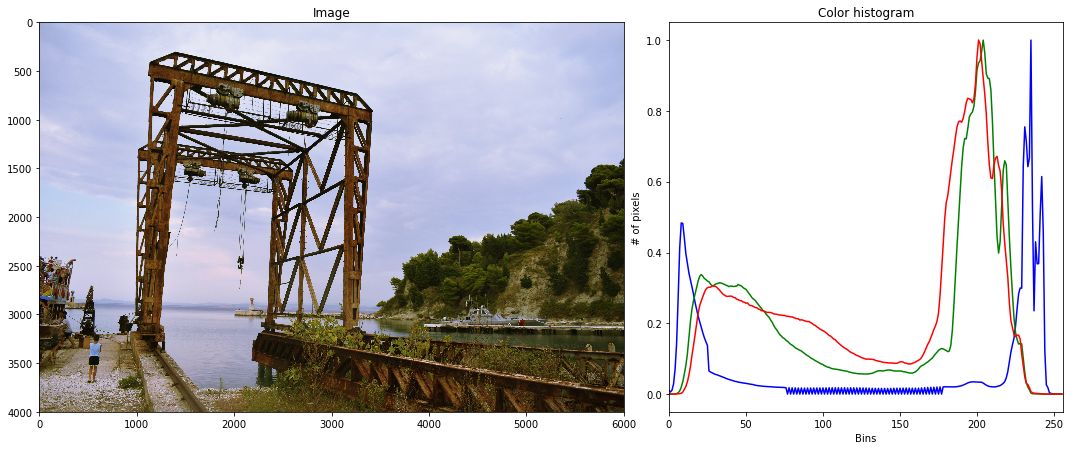

In [6]:
build_rgb_histogram(f.add_reds(img))
build_rgb_histogram(f.add_greens(img))
build_rgb_histogram(f.add_blues(img))


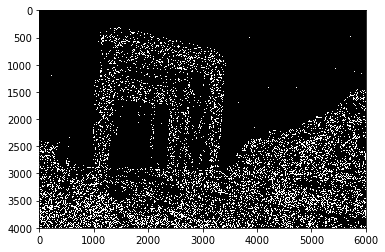

In [7]:
plt.figure()
plt.imshow(f.edgy(img, 20, 30), cmap='gray')